In [32]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np

nyc = pd.read_csv("AB_NYC_2019.csv")
print(nyc.head())
nyc = nyc.drop(columns = ["last_review"]) #this column was empty 





     id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  20

In [33]:
print(nyc.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [34]:
print(nyc.groupby(["neighbourhood_group"]).count().sort_values("neighbourhood",ascending = False))
print(nyc.fillna(0)) # filled meaning values within the columns with zero


                        id   name  host_id  host_name  neighbourhood  \
neighbourhood_group                                                    
Manhattan            21661  21652    21661      21652          21661   
Brooklyn             20104  20098    20104      20095          20104   
Queens                5666   5666     5666       5664           5666   
Bronx                 1091   1090     1091       1090           1091   
Staten Island          373    373      373        373            373   

                     latitude  longitude  room_type  price  minimum_nights  \
neighbourhood_group                                                          
Manhattan               21661      21661      21661  21661           21661   
Brooklyn                20104      20104      20104  20104           20104   
Queens                   5666       5666       5666   5666            5666   
Bronx                    1091       1091       1091   1091            1091   
Staten Island             3

In [35]:
print(nyc.tail())


             id                                               name   host_id  \
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_group       neighbourhood  latitude  \
48890        Sabrina            Brooklyn  Bedford-Stuyvesant  40.67853   
48891        Marisol            Brooklyn            Bushwick  40.70184   
48892  Ilgar & Aysel           Manhattan              Harlem  40.81475   
48893            Taz           Manhattan      Hell's Kitchen  40.75751   
48894     Christophe           Manhattan      Hell's Kitchen  40.76404   

       longitude        room_type  price  minimum_nights  number_of_review

In [86]:
nyc["reviews_per_month "] = nyc["reviews_per_month"].fillna(nyc["reviews_per_month"]).mean()

print(nyc) # filled the column "reviews per month" with the mean of other values

             id                                               name   host_id  \
0          2539                 Clean & quiet apt home by the park      2787   
1          2595                              Skylit Midtown Castle      2845   
2          3647                THE VILLAGE OF HARLEM....NEW YORK !      4632   
3          3831                    Cozy Entire Floor of Brownstone      4869   
4          5022   Entire Apt: Spacious Studio/Loft by central park      7192   
...         ...                                                ...       ...   
48890  36484665    Charming one bedroom - newly renovated rowhouse   8232441   
48891  36485057      Affordable room in Bushwick/East Williamsburg   6570630   
48892  36485431            Sunny Studio at Historical Neighborhood  23492952   
48893  36485609               43rd St. Time Square-cozy single bed  30985759   
48894  36487245  Trendy duplex in the very heart of Hell's Kitchen  68119814   

           host_name neighbourhood_grou

In [37]:
print(nyc.columns)

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'reviews_per_month '],
      dtype='object')


In [38]:
nyc["count"] = 0
print(nyc.groupby(["neighbourhood"]).count()["count"].sort_values(ascending = False))
# count the number of neighbourhoods with neighbourhood

neighbourhood
Williamsburg          3920
Bedford-Stuyvesant    3714
Harlem                2658
Bushwick              2465
Upper West Side       1971
                      ... 
Richmondtown             1
Willowbrook              1
Fort Wadsworth           1
New Dorp                 1
Woodrow                  1
Name: count, Length: 221, dtype: int64


In [39]:
nyc["count"]  = 1
print(nyc.groupby(["neighbourhood_group"]).count()["count"].sort_values(ascending = False))
#group various neigbourhood groups

neighbourhood_group
Manhattan        21661
Brooklyn         20104
Queens            5666
Bronx             1091
Staten Island      373
Name: count, dtype: int64


In [40]:
print(nyc.groupby(["longitude"]).count()['count'].sort_values(ascending = False))
#checked for the most visited place

longitude
-73.95427    18
-73.95677    18
-73.95405    17
-73.94791    16
-73.95332    16
             ..
-73.91203     1
-73.91205     1
-73.91206     1
-73.91207     1
-73.71299     1
Name: count, Length: 14718, dtype: int64


In [41]:
print(nyc.groupby(["price"]).count()["count"].sort_values(ascending = True))

price
888       1
820       1
814       1
805       1
362       1
       ... 
200    1401
60     1458
50     1534
150    2047
100    2051
Name: count, Length: 674, dtype: int64


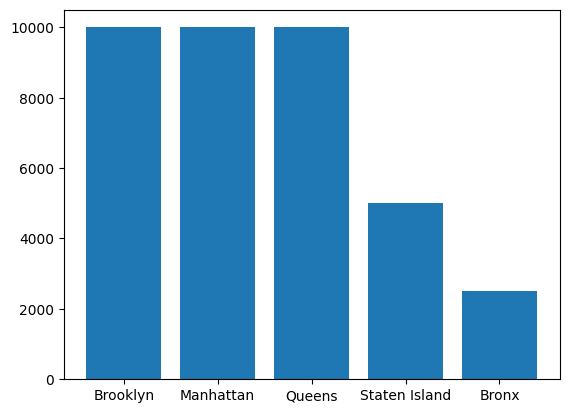

In [42]:
plt.bar(nyc["neighbourhood_group"], nyc["price"])

plt.show()

In [43]:
nyc.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,reviews_per_month,count
count,4.889500e+04,4.889500e+04,48895.000000,48895.000000,48895.000000,48895.000000,48895.000000,38843.000000,48895.000000,48895.000000,4.889500e+04,48895.0
mean,1.901714e+07,6.762001e+07,40.728949,-73.952170,152.720687,7.029962,23.274466,1.373221,7.143982,112.781327,1.373221e+00,1.0
std,1.098311e+07,7.861097e+07,0.054530,0.046157,240.154170,20.510550,44.550582,1.680442,32.952519,131.622289,4.440938e-16,0.0
min,2.539000e+03,2.438000e+03,40.499790,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,1.373221e+00,1.0
25%,9.471945e+06,7.822033e+06,40.690100,-73.983070,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000,1.373221e+00,1.0
50%,1.967728e+07,3.079382e+07,40.723070,-73.955680,106.000000,3.000000,5.000000,0.720000,1.000000,45.000000,1.373221e+00,1.0
75%,2.915218e+07,1.074344e+08,40.763115,-73.936275,175.000000,5.000000,24.000000,2.020000,2.000000,227.000000,1.373221e+00,1.0
max,3.648724e+07,2.743213e+08,40.913060,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000,1.373221e+00,1.0


In [44]:
nyc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              48895 non-null  int64  
 1   name                            48879 non-null  object 
 2   host_id                         48895 non-null  int64  
 3   host_name                       48874 non-null  object 
 4   neighbourhood_group             48895 non-null  object 
 5   neighbourhood                   48895 non-null  object 
 6   latitude                        48895 non-null  float64
 7   longitude                       48895 non-null  float64
 8   room_type                       48895 non-null  object 
 9   price                           48895 non-null  int64  
 10  minimum_nights                  48895 non-null  int64  
 11  number_of_reviews               48895 non-null  int64  
 12  reviews_per_month               

In [45]:
print(nyc[nyc["price"]> 157])
#prices of different airbub more than 157

             id                                             name    host_id  \
1          2595                            Skylit Midtown Castle       2845   
5          5099        Large Cozy 1 BR Apartment In Midtown East       7322   
16         7097                Perfect for Your Parents + Garden      17571   
19         7750                Huge 2 BR Upper East  Cental Park      17985   
20         7801                 Sweet and Spacious Brooklyn Loft      21207   
...         ...                                              ...        ...   
48872  36476675                                    Nycity-MyHome    8636072   
48873  36477307                                Brooklyn paradise  241945355   
48884  36482783      Brooklyn Oasis in the heart of Williamsburg  274307600   
48886  36483010                  Comfy 1 Bedroom in Midtown East  274311461   
48887  36483152  Garden Jewel Apartment in Williamsburg New York  208514239   

            host_name neighbourhood_group   neighbo

In [46]:
nyc[["price","neighbourhood","neighbourhood_group","number_of_reviews"]].sort_values("number_of_reviews",ascending = False)

,price,neighbourhood,neighbourhood_group,number_of_reviews
11759,47,Jamaica,Queens,629
2031,49,Harlem,Manhattan,607
2030,49,Harlem,Manhattan,597
2015,49,Harlem,Manhattan,594
13495,47,Jamaica,Queens,576
...,...,...,...,...
12724,250,SoHo,Manhattan,0
12721,175,Chelsea,Manhattan,0
12717,45,Harlem,Manhattan,0
12716,100,Crown Heights,Brooklyn,0


In [47]:
nyc[["price","neighbourhood","neighbourhood_group","number_of_reviews"]].sort_values("price",ascending = False)

,price,neighbourhood,neighbourhood_group,number_of_reviews
9151,10000,Astoria,Queens,2
17692,10000,Greenpoint,Brooklyn,5
29238,10000,Upper West Side,Manhattan,0
40433,9999,Lower East Side,Manhattan,0
12342,9999,Lower East Side,Manhattan,6
...,...,...,...,...
25778,0,Williamsburg,Brooklyn,3
25796,0,Bedford-Stuyvesant,Brooklyn,95
25433,0,East Morrisania,Bronx,55
26841,0,Bushwick,Brooklyn,2


In [48]:
nyc["num"] = 1
print(nyc.groupby(["price"]).count()["num"].sort_values(ascending = False))


price
100    2051
150    2047
50     1534
60     1458
200    1401
       ... 
362       1
361       1
805       1
814       1
578       1
Name: num, Length: 674, dtype: int64


In [49]:
print(nyc.groupby(["room_type","price","neighbourhood"]).count().sort_values("room_type",ascending = False))

                                          id  name  host_id  host_name  \
room_type       price neighbourhood                                      
Shared room     1800  Astoria              1     1        1          1   
                39    Harlem               2     2        2          2   
                40    Borough Park         1     1        1          1   
                      Bedford-Stuyvesant   3     3        3          3   
                      Astoria              3     3        3          3   
...                                       ..   ...      ...        ...   
Entire home/apt 198   Windsor Terrace      1     1        1          1   
                199   Arrochar             1     1        1          1   
                      Arverne              1     1        1          1   
                      Astoria              2     2        2          2   
                425   Van Nest             1     1        1          1   

                                     

In [50]:
nyc["count"] = 1
print(nyc.groupby(["room_type"]).count()["count"].sort_values(ascending = False))



room_type
Entire home/apt    25409
Private room       22326
Shared room         1160
Name: count, dtype: int64


In [51]:
print(nyc.groupby(["room_type","neighbourhood_group"]).count()["count"].sort_values(ascending = False))

room_type        neighbourhood_group
Entire home/apt  Manhattan              13199
Private room     Brooklyn               10132
Entire home/apt  Brooklyn                9559
Private room     Manhattan               7982
                 Queens                  3372
Entire home/apt  Queens                  2096
Private room     Bronx                    652
Shared room      Manhattan                480
                 Brooklyn                 413
Entire home/apt  Bronx                    379
Shared room      Queens                   198
Private room     Staten Island            188
Entire home/apt  Staten Island            176
Shared room      Bronx                     60
                 Staten Island              9
Name: count, dtype: int64


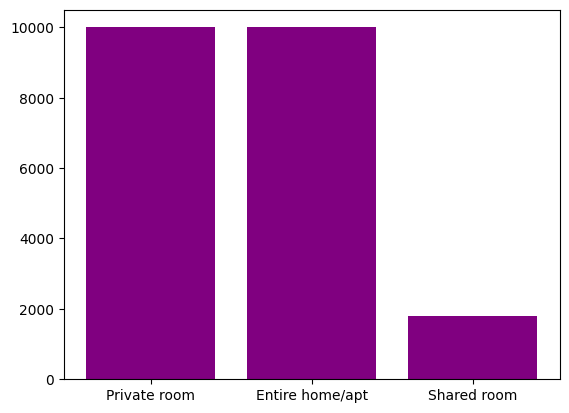

In [52]:
plt.bar(nyc["room_type"],nyc["price"],color = 'purple')


plt.show()

In [53]:
print(nyc.groupby(["room_type","price"]).count().sort_values("room_type",ascending = False))

                       id  name  host_id  host_name  neighbourhood_group  \
room_type       price                                                      
Shared room     1800    1     1        1          1                    1   
                56      3     3        3          3                    3   
                43      5     5        5          5                    5   
                44      5     5        5          5                    5   
                45     53    53       53         53                   53   
...                    ..   ...      ...        ...                  ...   
Entire home/apt 418     2     2        2          2                    2   
                419     5     5        5          5                    5   
                420    11    11       11         11                   11   
                421     2     2        2          2                    2   
                1177    1     1        1          1                    1   

           

In [63]:
nyc["count"] = 1
print(nyc.groupby("minimum_nights").count()["count"].sort_values(ascending = False))


minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
182         1
183         1
184         1
185         1
1250        1
Name: count, Length: 109, dtype: int64


In [71]:
print(nyc.groupby(["neighbourhood_group","minimum_nights"]).count().sort_values("neighbourhood_group",ascending = False))

                                     id  name  host_id  host_name  \
neighbourhood_group minimum_nights                                  
Staten Island       365               1     1        1          1   
                    7                 9     9        9          9   
                    1               112   112      112        112   
                    2               122   122      122        122   
                    4                45    45       45         45   
...                                 ...   ...      ...        ...   
Bronx               91                1     1        1          1   
                    93                1     1        1          1   
                    186               1     1        1          1   
                    365               1     1        1          1   
                    1               362   361      362        362   

                                    neighbourhood  latitude  longitude  \
neighbourhood_group minimum_

In [74]:
print(nyc.groupby(["name","number_of_reviews"]).count().sort_values("name",ascending = True))

                                                                    id  \
name                                             number_of_reviews       
 1 Bed Apt in Utopic Williamsburg                8                   1   
 2-3 bedroom UWS garden triplex                  4                   1   
 3 bedroom loft in Williamsburg                  48                  1   
 A charming Space in Brooklyn                    44                  1   
 AMAZING TIME SQUARE!!BRICK WALLS!!              3                   1   
...                                                                 ..   
한성 韓城 Han B (2F)                                 39                  1   
한성 韓城 Han C (2F)                                 58                  1   
️CENTRALLY LOCATED️- Great for Families + Groups 16                  1   
ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2                          3                   1   
ﾏﾝﾊｯﾀﾝ､駅から徒歩4分でどこに行くのにも便利な場所!女性の方希望,ｷﾚｲなお部屋｡     0                   1   

                                     

In [78]:
print(nyc.groupby(["minimum_nights"]).count()["count"].sort_values(ascending = False))

minimum_nights
1       12720
2       11696
3        7999
30       3760
4        3303
        ...  
182         1
183         1
184         1
185         1
1250        1
Name: count, Length: 109, dtype: int64


1. Different host and areas.Cities within the dateset for airbub are Manhanttan, Brooklyn, Queens,Bronx and Staten Island. 
Room types availavble are entire homes,private rooms and shared rooms.

2. The higher price for airbub within the dataset is $1000, lowest = $47 and avearage is $157
The most expensive airbub are found in Brooklyn(green point), Queens(Astoria) and Manhanttan(Upper west side),while the cheapest are found in Bronx.
Queens(Jamaica) has the highest number of reviews with a price of about $47
The most sort after airbub are Entire home or apartments
3. The busiest host will be Manhanttan within the neighbourhood of willambury because in the dateset it has the highest count also the most visited place by people for airbub.
The most registered name is Micheal
Maximum nights = 1250



In [80]:
#nyc.to_csv("newAirbub.csv", index = False)

